In [2]:
using JLD2
using Revise
using ITensors
using LinearAlgebra
using Plots
using LsqFit

In [3]:

func1(t, p) = p[1] .+ p[2]./t.^2
func2(t, p) = p[1] .+ p[2]./t .+ p[3]./t.^2 
func3(t, p) = p[1] .+ p[2]./t .+ p[3]./t.^2 + p[4]./t.^3
func4(t, p) = p[1] .+ p[2]./t .+ p[3]./t.^2 + p[4]./t.^3 .+ p[5]./t.^4

funcexp(t, p) = p[1] .+ p[2].*exp.(-p[3].*t)


p0_1 = [1., 1.]
p0_2 = [1., 1., 0.1]
p0_3 = [1., 1., 1., 1.]
p0_4 = [1., 1., 1., 1., 1.]


5-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0

In [4]:
fns = ["ising_beta$(ii).jld2" for ii in 0:2:8]

5-element Vector{String}:
 "ising_beta0.jld2"
 "ising_beta2.jld2"
 "ising_beta4.jld2"
 "ising_beta6.jld2"
 "ising_beta8.jld2"

20 + tstart:(20 + length(ae)) - 1 = 20:140
fit1.param = [0.4002530573749201, 1.9941964229695728]
fit2.param = [0.40015132229865835, 0.01119600482694078, 1.7722737176409986]
fit3.param = [0.40023212201272007, -0.0024381964382416913, 2.397124551463404, -8.103157353531643]
fit4.param = [0.4002548316100269, -0.0074742136534300145, 2.75804737861852, -18.17848457848786, 94.80886159643724]
fitexp.param = [0.40098074814144147, -210.9480298136324, 11.978951821171323]
20 + tstart:(20 + length(ae)) - 1 = 30:140
fit1.param = [0.4002341948859937, 2.0792918512424277]
fit2.param = [0.40019194942401703, 0.00559233966622642, 1.9284527185148483]
fit3.param = [0.4002455799402442, -0.005237235985502595, 2.5711200258148668, -11.400731065447102]
fit4.param = [0.40018242726936976, 0.011610168880206079, 1.0319697864277129, 46.031604613669984, -746.9863536346994]
fitexp.param = [0.4007358034894711, -0.942174615847736, 5.552472805765851]
20 + tstart:(20 + length(ae)) - 1 = 40:140
fit1.param = [0.400227839416080

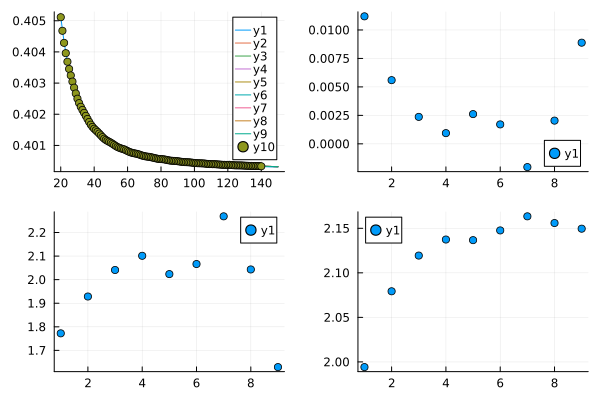

In [5]:
aa = jldopen("ising_beta2n.jld2")
ae = aa["allens"]  # T should go from 20 to 140

cf_beta2_0 = []
cf_beta2 = []
cf_beta2_2 = []

pl1 = plot()

for tstart = 0:10:81
    fit1 = curve_fit(func1, range(20+tstart,20+length(ae)-1), log.(abs.(ae))[tstart+1:end], p0_1)
    fit2 = curve_fit(func2, range(20+tstart,20+length(ae)-1), log.(abs.(ae))[tstart+1:end], p0_2)
    fit3 = curve_fit(func3, range(20+tstart,20+length(ae)-1), log.(abs.(ae))[tstart+1:end], p0_3)
    fit4 = curve_fit(func4, range(20+tstart,20+length(ae)-1), log.(abs.(ae))[tstart+1:end], p0_4)

    fitexp = curve_fit(funcexp, range(20+tstart,20+length(ae)-1), log.(abs.(ae))[tstart+1:end], p0_2)


    plot!(pl1, range(20+tstart,150), func2(range(20+tstart,150), fit2.param))
    #plot!(pl1, range(20+tstart,150), funcexp(range(20+tstart,150), fitexp.param))

    @show (20+tstart):(20+length(ae)-1)

    @show fit1.param
    @show fit2.param
    @show fit3.param
    @show fit4.param

    @show fitexp.param

    push!(cf_beta2_0, fit1.param[2])

    push!(cf_beta2, fit2.param[2])
    push!(cf_beta2_2, fit2.param[3])


end

scatter!(pl1, range(20,20+length(ae)-1), log.(abs.(ae)))

pl2 = scatter(cf_beta2)
pl3 = scatter(cf_beta2_2)
pl4 = scatter(cf_beta2_0)


plot(pl1, pl2, pl3, pl4, layout=4)

[0.9098090921187937, 0.03719956485858541, 2.1388869753887607]
[0.9099517583746826, 0.017361098385483085, 2.700186844734053]
[0.9099998371937572, 0.009677890732888519, 2.9697313847702427]
[0.9100211196754171, 0.005909962902946977, 3.1228052419010286]
[0.910031486474277, 0.003923090644603202, 3.212631724995642]
[0.9100347622855056, 0.0032582351755446794, 3.2449829049021806]
[0.9100308260042739, 0.004124427494631308, 3.198425592464838]
[0.9100197491919035, 0.006661412266985698, 3.0554807175651546]
[0.9099852676745865, 0.014965852526464762, 2.559967958733221]


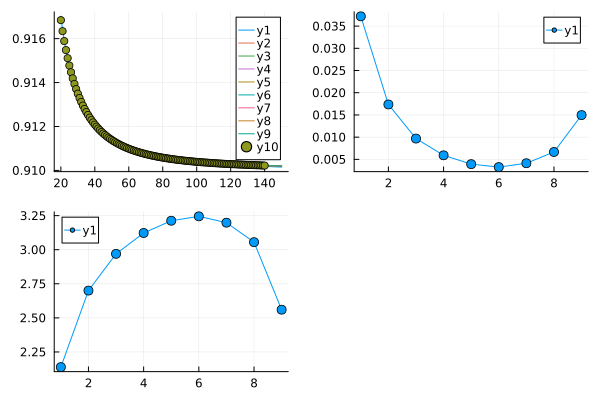

In [7]:
aa = jldopen("ising_beta4n.jld2")
ae = aa["allens"]  # T should go from 20 to 120

cf_beta4_0 = []
cf_beta4 = []
cf_beta4_2 = []


pl1 = plot()


for tstart = 0:10:81

    fit1 = curve_fit(func1, range(20+tstart,20+length(ae)-1), log.(abs.(ae))[tstart+1:end], p0_1)
    fit2 = curve_fit(func2, range(20+tstart,20+length(ae)-1), log.(abs.(ae))[tstart+1:end], p0_2)

    plot!(pl1, range(20+tstart,150), func2(range(20+tstart,150), fit2.param))

    println(fit2.param)

    push!(cf_beta4_0, fit1.param[2])
    push!(cf_beta4, fit2.param[2])
    push!(cf_beta4_2, fit2.param[3])


end

scatter!(pl1, range(20,20+length(ae)-1), log.(abs.(ae)))

pl2 = plot(cf_beta4, marker=(:circle,5))
pl3 = plot(cf_beta4_2,  marker=(:circle,5))

plot(pl1, pl2, pl3, layout=3)


[1.419726109336448, 0.07662982898383247, 1.9139057332655827]
[1.4199879242276372, 0.04014675096029513, 2.9496821108112936]
[1.4200873587001135, 0.024248514651741163, 3.507864147111923]
[1.4201326899398663, 0.01622008029873768, 3.834182304480194]
[1.420156438152525, 0.011659250918692651, 4.040934541960029]
[1.420170854772781, 0.008697956646785202, 4.187262793645559]
[1.4201807765915542, 0.006537266052900386, 4.301971416275081]
[1.4201859028798767, 0.005362670448832636, 4.368182376693649]
[1.4201863014715619, 0.0052872923271183436, 4.371304358783979]


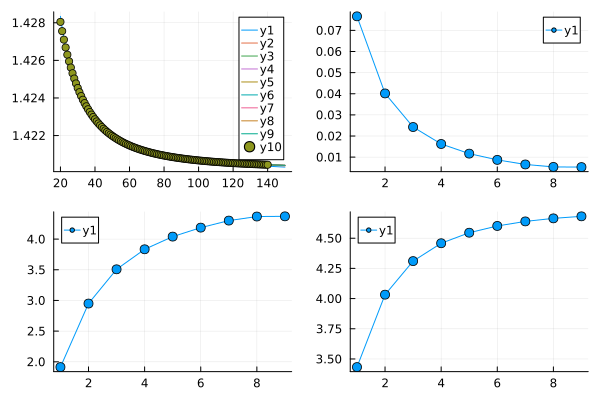

In [8]:
aa = jldopen("ising_beta6n.jld2")
ae = aa["allens"]  # T should go from 20 to 120

cf_beta6_0 = []
cf_beta6 = []
cf_beta6_2 = []

pl1 = plot()


for tstart = 0:10:81
    #@info "fitting in range $(20+tstart):$(20+length(ae)-1)"
    fit1 = curve_fit(func1, range(20+tstart,20+length(ae)-1), log.(abs.(ae))[tstart+1:end], p0_1)
    fit2 = curve_fit(func2, range(20+tstart,20+length(ae)-1), log.(abs.(ae))[tstart+1:end], p0_2)

    plot!(pl1, range(20+tstart,150), func2(range(20+tstart,150), fit2.param))

    println(fit2.param)
    push!(cf_beta6_0, fit1.param[2])
    push!(cf_beta6, fit2.param[2])
    push!(cf_beta6_2, fit2.param[3])

end


scatter!(pl1, range(20,20+length(ae)-1), log.(abs.(ae)))

pl2 = plot(cf_beta6, marker=(:circle,5))
pl3 = plot(cf_beta6_2,  marker=(:circle,5))
pl4 = plot(cf_beta6_0,  marker=(:circle,5))


plot(pl1, pl2, pl3, pl4)

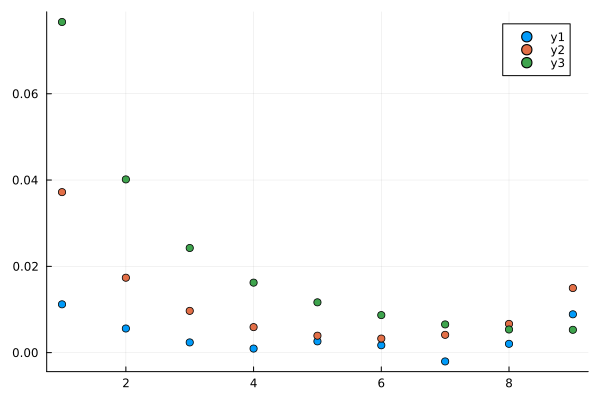

In [9]:
scatter(cf_beta2)
scatter!(cf_beta4)
scatter!(cf_beta6)

[-0.10832158446304241, -0.0237814465519675, 1.1471297970643917]
[0.40014028189079826, 0.012089387159884196, 1.7571072005720452]
[0.909757303472912, 0.04144582306499544, 2.0663200850093997]
[1.419628951367516, 0.08460221479941707, 1.7776036600577034]
[1.9296177684045, 0.13306917848381877, 1.104009202455187]


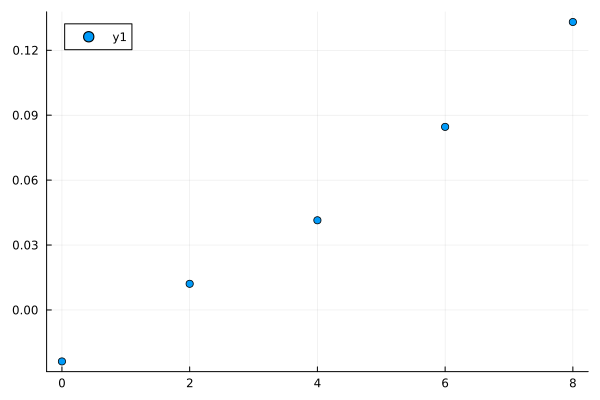

In [10]:
coeffs1 = []
for fn in fns
    a = jldopen(fn)
    allens = a["allens"]
    #fit1 = curve_fit(func1, range(20,100), log.(abs.(allens)), p0_1)
    fit2 = curve_fit(func2, range(20,20+length(allens)-1), log.(abs.(allens)), p0_2)

    scatter(log.(abs.(allens)))
    plot!(func2(range(20,130), fit2.param))

    println(fit2.param)
    push!(coeffs1, fit2.param[2])
    0.5 * π/24
end

scatter(0:2:8, coeffs1)


20 + tstart:(20 + length(ae)) - 1 = 20:140
fit1.param = [0.4002530573749201, 1.9941964229695728]
fit2.param = [0.40015132229865835, 0.01119600482694078, 1.7722737176409986]
fit3.param = [0.40023212201272007, -0.0024381964382416913, 2.397124551463404, -8.103157353531643]
fitexp.param = [0.40098074814144147, -210.9480298136324, 11.978951821171323]
20 + tstart:(20 + length(ae)) - 1 = 30:140
fit1.param = [0.4002341948859937, 2.0792918512424277]
fit2.param = [0.40019194942401703, 0.00559233966622642, 1.9284527185148483]
fit3.param = [0.4002455799402442, -0.005237235985502595, 2.5711200258148668, -11.400731065447102]
fitexp.param = [0.4007358034894711, -0.942174615847736, 5.552472805765851]
20 + tstart:(20 + length(ae)) - 1 = 40:140
fit1.param = [0.40022783941608087, 2.119374698672323]
fit2.param = [0.40021220576227934, 0.002368870678409469, 2.0409681323062094]
fit3.param = [0.40022298629666053, -0.00011204000103930072, 2.21622569612629, -3.8299060335627546]
fitexp.param = [0.400609698196451

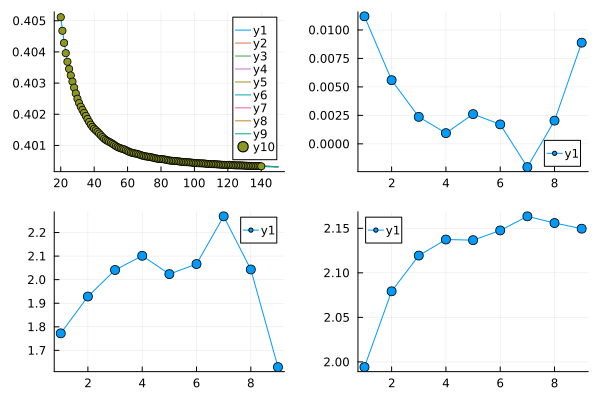

In [11]:
aa = jldopen("ising_beta2n.jld2")
ae = aa["allens"]  # T should go from 20 to 140

cf_beta2_0 = []
cf_beta2 = []
cf_beta2_2 = []

pl1 = plot()

for tstart = 0:10:81
    fit1 = curve_fit(func1, range(20+tstart,20+length(ae)-1), log.(abs.(ae))[tstart+1:end], p0_1)
    fit2 = curve_fit(func2, range(20+tstart,20+length(ae)-1), log.(abs.(ae))[tstart+1:end], p0_2)
    fit3 = curve_fit(func3, range(20+tstart,20+length(ae)-1), log.(abs.(ae))[tstart+1:end], p0_3)
    fitexp = curve_fit(funcexp, range(20+tstart,20+length(ae)-1), log.(abs.(ae))[tstart+1:end], p0_2)


    plot!(pl1, range(20+tstart,150), func2(range(20+tstart,150), fit2.param))
    #plot!(pl1, range(20+tstart,150), funcexp(range(20+tstart,150), fitexp.param))

    @show (20+tstart):(20+length(ae)-1)

    @show fit1.param
    @show fit2.param
    @show fit3.param
    @show fitexp.param

    push!(cf_beta2_0, fit1.param[2])

    push!(cf_beta2, fit2.param[2])
    push!(cf_beta2_2, fit2.param[3])


end

scatter!(pl1, range(20,20+length(ae)-1), log.(abs.(ae)))

pl2 = plot(cf_beta2, marker=(:circle,5))
pl3 = plot(cf_beta2_2, marker=(:circle,5))
pl4 = plot(cf_beta2_0,  marker=(:circle,5))


plot(pl1, pl2, pl3, pl4, layout=4)

In [12]:

lin_func(t, p) = p[1] .+ p[2].*t

p0 = [-3,1.]
p1 = plot()
for nbeta = [2,4,6]
    aa = jldopen("ising_beta$(nbeta)n.jld2")
    ae = aa["allens"]  # T should go from 20 to 140

    scatter!(p1, range(10, 30) , angle.(ae)[10:30])
    fitlin = curve_fit(lin_func, range(20+10, 40+10), angle.(ae)[10:30], p0)
    @show fitlin.param
end


plot!(p1,  angle.(ae), p0)


fitlin.param = [-6.4268355994730735, 0.1272453129064676]
fitlin.param = [-6.425296861836639, 0.12721675157138781]
fitlin.param = [-6.423421810073259, 0.12718273282915565]


In [13]:
aa = jldopen("ising_beta2n.jld2")
ae = aa["allens"] 
plot(angle.(ae), p0)
